<a href="https://colab.research.google.com/github/Ryu4824/code-states/blob/main/n214_discussion_6%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **N214 Logistic Regression**

## 오늘의 목표
- scikit-learn을 이용해 로지스틱 회귀 모델을 만들어 학습하고 해석할 수 있습니다.
- 분류 평가지표를 이해하고 사용할 수 있습니다.  


## **개념 Topic**
> 오늘은 분류 모델인 로지스틱 회귀(Logistic Regression) 모델에 대해 배웠습니다. 

- 로지스틱 회귀를 한 문장으로 요약하여 설명해보세요.
  - `로지스틱 회귀모델은 0과 1 사이의 값을 출력하며 출력값이 0.5 이상일 경우는 Class1로 0.5 미만일 경우는 Class0으로 분류합니다.`를 제외한 문장이어야 합니다.
  - 어떤 키워드가 포함되어야할지 키워드 위주로 고민해보세요.
  - 만약 설명이 어렵다면 어느 부분이 이해가 안 되는지 구체적인 질문을 동기들과 나눠보세요.
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

### Keyword : 이진 분류, 선형 회귀에 로그를 사용한다, 시그모이드, 범주형 데이터
### 요약 : 분류를 위해 독립변수들의 선형 결합으로 어떤 범주에 속하는지 확률값을 예측하는 것.
$$ \huge \frac {1}{1-e^{-f(x)}} $$

## **코딩 Topic**

### **Part.1 : 데이터 준비**
통신사 고객의 계약 해지 데이터셋인 [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)를 사용해서 해지 여부를 예측하는 분류 문제를 풀어보겠습니다.

데이터에 대한 더 자세한 설명은 위의 링크를 참고하세요.
> **Data Description**

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

In [1]:
#해당 라이브러리 설치 후 런타임 다시 시작 -> 이후 셀 진행
!pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 2.7 MB/s eta 0:00:00


#### **1-1. 데이터 불러오기 및 전처리**
- 데이터셋을 불러오세요. 
- `customerID` colulmn을 제거하세요. 
- 결측치 및 중복인 샘플(row)을 제거하세요. 
- `TotalCharges` column에서 공란인 데이터는 모두 0으로 바꾼 후, `TotalCharges` 데이터 타입을 `float`으로 변환하세요. 
- 타겟 클래스 비율을 확인해 보세요. 
  - 타겟 변수는 `Churn`입니다. 

In [3]:
# 데이터셋 불러오기 
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/renewal/mldl/Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Numeric Data : tenure, MonthlyCharges, TotalCharges
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# customer ID column 제거
df.drop('customerID', axis = 1, inplace = True)

In [6]:
# 결측값 확인
# df.isnull().sum()
# 중복값 확인(22개) 후 제거
# df.duplicated().sum()
df.drop_duplicates(inplace = True)
# index 초기화
df.reset_index(drop = True, inplace = True)

In [7]:
# TotalCharges column 공란 0으로 변경
df['TotalCharges'] = df['TotalCharges'].replace({' ' : '0'})
# TotalCharges data type str to float
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [8]:
# Target class 비율 확인
# No : 73% / Yes : 27% => class imbalance
df['Churn'].value_counts(normalize = True)

No     0.735508
Yes    0.264492
Name: Churn, dtype: float64

#### **1-2. 데이터셋 분리**
- 특성 X와 타겟 y를 지정하세요.
  - 타겟 데이터를 `No`는 0으로, `Yes`는 1로 변환하세요.
- X와 y 모두 train/test set으로 분리하세요.
  - train : test 비는 8:2로 설정하세요.
  - `random_state`를 설정하여 고정된 결과가 나오도록 해 보세요.
  - 타겟 클래스 비율이 유지되도록 분리하세요.
    - [공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)를 참고하여 어떤 옵션을 설정하면 되는지 찾아보세요. 

In [9]:
# Feature, Target 지정
Feature = df.drop('Churn', axis = 1).columns
Target = 'Churn'
X = df[Feature]
Y = df[Target]
# Target 데이터 변환
Y = Y.replace({'No' : 0 , 'Yes' : 1})

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2, stratify = Y)

#### **1-3. Scaling 후 데이터를 확인합니다.**
- 수치형 변수에 `StandardScaler()`를 적용하세요.

In [11]:
from sklearn.preprocessing import StandardScaler
# Numeric feature list
num_features =  ['tenure', 'MonthlyCharges', 'TotalCharges']
# Data Scaling
scaling = StandardScaler()
X_train[num_features] = scaling.fit_transform(X_train[num_features])
X_test[num_features] = scaling.transform(X_test[num_features])

#### **1-4. Encoding 후 데이터를 확인합니다.**
- 범주형 변수에 `OneHotEncoder()`를 적용하세요. 
  - [공식문서](https://contrib.scikit-learn.org/category_encoders/onehot.html)를 참고하여 필요한 파라미터들을 설정해 볼 수 있습니다. 

In [12]:
from category_encoders import OneHotEncoder
# One Hot Encoding
encoder = OneHotEncoder(use_cat_names=True)
X_train_EN = encoder.fit_transform(X_train)
X_test_EN = encoder.transform(X_test)

In [13]:
X_train_EN

,gender_Female,gender_Male,SeniorCitizen,Partner_Yes,Partner_No,Dependents_Yes,Dependents_No,tenure,PhoneService_Yes,PhoneService_No,...,Contract_One year,Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic),MonthlyCharges,TotalCharges
2287,1,0,0,1,0,1,0,0.876410,1,0,...,0,0,1,0,1,0,0,0,0.884933,1.178941
4006,1,0,0,0,1,0,1,0.145535,1,0,...,1,0,1,0,0,1,0,0,-0.342846,-0.170577
5685,1,0,0,1,0,0,1,1.526078,1,0,...,1,0,0,1,0,0,1,0,1.491326,2.369429
359,0,1,0,1,0,1,0,0.389160,1,0,...,1,0,1,0,0,0,1,0,1.078179,0.762310
1737,0,1,0,0,1,0,1,-0.666550,1,0,...,0,1,0,1,0,0,0,1,0.221899,-0.469962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1,0,0,1,0,0,1,-1.153800,1,0,...,0,1,1,0,0,0,1,0,-1.485663,-0.962362
1555,1,0,0,0,1,0,1,-0.666550,1,0,...,0,1,0,1,1,0,0,0,1.028202,-0.319018
2175,0,1,1,1,0,0,1,1.566682,1,0,...,0,0,0,1,1,0,0,0,1.024870,1.944385
5580,0,1,0,0,1,0,1,-0.788362,1,0,...,0,0,1,0,0,1,0,0,-1.498991,-0.885758


### **Part.2 : 모델 학습 및 예측**

#### **2-1. 기준모델**
- 최빈값을 이용하여 기준모델을 만들고, accuracy 값을 확인하세요. 
  - 기준모델은 train set에 대하여 생성합니다. 

In [14]:
# 최빈값 구하기
freq = Y_train.mode()[0]
# Base Line 설정
Y_pred_base = [freq] * len(Y_train)

from sklearn.metrics import accuracy_score
# Base Line Accuracy 출력
print(f'Base Line Acc : {accuracy_score(Y_train,Y_pred_base).round(2)}')

Base Line Acc : 0.74


#### **2-2. 로지스틱 회귀**
- 로지스틱 회귀 모델을 학습하고, train 및 test set에 대하여 accuracy 값을 확인하세요. 
  - 타겟 클래스 비율이 불균형하므로 `class_weight='balanced'`로 설정하세요. 
- test set에 `.predict()`와 `.predict_proba()`를 적용하여 결과를 비교해 보세요. 
  - 10개의 데이터만 확인해 보세요.

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight = 'balanced')
LR.fit(X_train_EN, Y_train)
Y_pred_LR = LR.predict(X_test_EN)
Y_proba_LR = LR.predict_proba(X_test_EN)[:,1]

# Train Accuracy 출력
print(f'Logistic Regression Acc : {LR.score(X_train_EN, Y_train).round(2)}')
# Test Accuracy 출력
print(f'Logistic Regression Acc : {LR.score(X_test_EN, Y_test).round(2)}')

Logistic Regression Acc : 0.76
Logistic Regression Acc : 0.71


In [16]:
table = pd.DataFrame(columns = ['predict','probability'])
table['predict'] = Y_pred_LR[:10]
table['probability'] = Y_proba_LR[:10]

In [17]:
table

,predict,probability
0,1,0.781700
1,1,0.564442
2,0,0.018560
3,1,0.806582
4,1,0.781379
5,0,0.479328
6,0,0.191023
7,0,0.152691
8,0,0.026334
9,0,0.106842


#### **2-3. 회귀계수 해석**
- 회귀계수가 양수인 상위 3개 특성을 확인해 보세요. 
- 회귀계수가 음수인 하위 3개 특성을 확인해 보세요. 

In [18]:
print('회귀 계수 양수인 상위 3개 특성')
print(pd.Series(LR.coef_[0], LR.feature_names_in_).sort_values(ascending=False).head(3),'\n')
print('-------------------------------')
print('회귀 계수 음수인 상위 3개 특성')
print(pd.Series(LR.coef_[0], LR.feature_names_in_).sort_values().head(3),'\n')

회귀 계수 양수인 상위 3개 특성
TotalCharges                   0.726913
Contract_Month-to-month        0.712965
InternetService_Fiber optic    0.648301
dtype: float64 

-------------------------------
회귀 계수 음수인 상위 3개 특성
tenure                -1.428140
Contract_Two year     -0.716398
InternetService_DSL   -0.473906
dtype: float64 



### **Part.3 : 성능 평가**

#### **3-1. Confusion Matrix**
- test set에 대한 예측값을 바탕으로 confusion matrix를 나타내 보세요.

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(Y_test, Y_pred_LR)

array([[717, 316],
       [ 85, 287]])

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


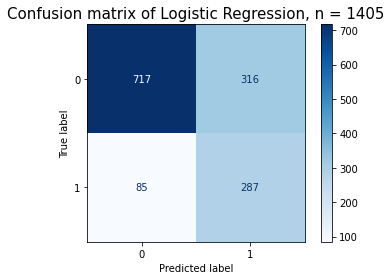

In [21]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(LR, X_test_EN, Y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(Y_test)}', fontsize=15)
plt.show()

#### **3-2. 분류 평가지표**
- test set에 대하여 precision, recall, f1 score 값을 확인하세요.

In [22]:
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
print(classification_report(Y_test, Y_pred_LR))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1033
           1       0.48      0.77      0.59       372

    accuracy                           0.71      1405
   macro avg       0.68      0.73      0.69      1405
weighted avg       0.78      0.71      0.73      1405



In [25]:
print(classification_report(Y_train,Y_pred_base)) #기준모델과 로지스틱 회귀 모델의 recall 비교

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4131
           1       0.00      0.00      0.00      1485

    accuracy                           0.74      5616
   macro avg       0.37      0.50      0.42      5616
weighted avg       0.54      0.74      0.62      5616



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **3-3. AUC Score**
- test set에 대하여 AUC Score 값을 확인하세요. 

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, LR.predict_proba(X_test_EN)[:,1]).round(2)

0.83

### **Conclusion**
> 오늘 Topic을 수행한 결과를 바탕으로, 다음 사항에 대해 발표해 주세요.

1. 회귀계수가 양수인 상위 3개 특성을 바탕으로 결과를 해석해 보세요. 
2. 회귀계수가 음수인 하위 3개 특성을 바탕으로 결과를 해석해 보세요. 
3. 기준모델과 로지스틱 회귀 모델의 accuracy 값을 비교해 보세요. 평가지표로 accuracy를 사용하기에 적절한가요? 
4. Confusion Matrix 및 적절한 분류 평가지표를 선택하여 결과를 해석해 보세요. 
- **Discussion** 표의 `정리` 탭에 답변을 정리하여 적어 주세요. 

## **심화 Topic**
- 주변에서 찾아볼 수 있는 분류 문제는 무엇이 있을까요? 여러분이 실제로 프로젝트를 한다고 생각하고 관심 도메인에서 구체적으로 어떤 예시가 있을지 생각해보세요.
  - 여러분들은 어떤 프로젝트가 하고 싶으세요? 서로 아이디어를 나눠보세요.
  - 해당 문제를 풀었을 때 비즈니스적으로 어떤 가치있는 결론을 도출할 수 있을지도 함께 생각해 보세요. 